<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução ao Kaggle;</li>
  <li>Introdução ao problema de negócios;</li>
  <li>Exploração de dados.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

A **Loggi** é uma empresa do setor logístico que faz entregas em todo o Brasil, sendo que ela possui uma capacidade máxima de entrega em seus veículos, possui pontos de entregas e ***hubs*** relacionados. Neste notebook, será realizada uma **Análise Exploratória de Dados (EDA)**, com o intuito de conhecer os ***hubs*** distribuídos no **Distrito Federal (DF)**, bem como a proporção de entregas feitas por esses ***hubs***.

## 2\. Pacotes e bibliotecas

In [ ]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 3\. Exploração de dados

**Coleta dos dados**

```
!wget -q <LINK> -O <ARQUIVO.json>
```

In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O entregas.json 

> **Leando o arquivo** *json* **:**

In [ ]:
with open('entregas.json', mode = 'r', encoding = 'utf8') as arquivo:
  dados = json.load(arquivo)

In [ ]:
dados[5]

In [ ]:
type(dados)

list

> **Explorando os dados do arquivo json**

In [ ]:
exemplo_de_linha = dados[50]
exemplo_de_linha.keys()

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])

In [ ]:
exemplo_de_linha['vehicle_capacity']

180

In [ ]:
ultima_entrega = exemplo_de_linha['deliveries'][-1]
ultima_entrega

{'id': 'c85bb05b045fd442ca9107ea580b5f09',
 'point': {'lat': -15.641188942039673, 'lng': -47.79081534776085},
 'size': 5}

> **Convertendo os dados (json) para um DataFrame do Pandas**

In [ ]:
entregas_Loggi = pd.DataFrame(dados)
entregas_Loggi.head()
#entregas_Loggi.to_latex('table.tex')

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


**Data Wrangling**

In [ ]:
entregas_Loggi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              199 non-null    object
 1   region            199 non-null    object
 2   origin            199 non-null    object
 3   vehicle_capacity  199 non-null    int64 
 4   deliveries        199 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [ ]:
entregas_Loggi.shape

(199, 5)

In [ ]:
entregas_Loggi.columns

Index(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'], dtype='object')

> **Renomeando as colunas**

In [ ]:
entregas_Loggi.columns = ['nome', 'regiao', 'origem', 
                          'capacidade_veiculo', 'entregas']
entregas_Loggi.head(2)

,nome,regiao,origem,capacidade_veiculo,entregas
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."


> **Dividindo os dados da coluna 'origem' em duas colunas contendo 'longitude' e 'latitude'**

Para isso, é possível usar a função ```<JSON_NORMALIZE>```, salvar essas informações em um ```dataframe``` e fazer um ```merge``` com o dataframe ```entregas_Loggi```

In [ ]:
dados_origem = pd.json_normalize(entregas_Loggi['origem'])
dados_origem.columns = ['longitude_origem', 'latitude_origem']
dados_origem.head(3)

,longitude_origem,latitude_origem
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145


In [ ]:
entregas_Loggi = pd.merge(left = entregas_Loggi,
                          right = dados_origem,
                          how = 'inner',
                          left_index = True,
                          right_index = True)

entregas_Loggi.drop('origem', axis = 1, inplace = True)
entregas_Loggi.head(3)

,nome,regiao,capacidade_veiculo,entregas,longitude_origem,latitude_origem
0,cvrp-2-df-33,df-2,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145


Lembrando que em cada entrega temos:


**ENTREGA *(n)***
```
[
  {'id': <string>,
   'point: {'lng':, <float>, 'lat': <float>},
   'size': <int>
   }
]
```



Logo, precisamos aplicar um `explode` para separar as informações que estão contidas em um dicionário na coluna `'entregas'`

In [ ]:
dados_entrega = entregas_Loggi[['entregas']].explode('entregas')
dados_entrega.head(1)

,entregas
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."


Com base no **dataframe** obtido, vamos precisar concatenar (`pd.concat`) com o **dataframe** `entregas_Loggi`, pois existem vários itens da linha 0, da linha 1, ..., da linha 198. Antes disso, criamos 3 **dataframes** contendo o tamanho da entrega, bem como a latitude e a longitude do ponto de entrega.




In [ ]:
entregas_normalizado = pd.concat([
  pd.DataFrame(dados_entrega['entregas'].apply(lambda registro: registro["size"])).rename(columns={'entregas': 'tamanho_entrega'}),
  pd.DataFrame(dados_entrega['entregas'].apply(lambda registro: registro["point"]["lng"])).rename(columns={'entregas': 'longitude_entrega'}),
  pd.DataFrame(dados_entrega['entregas'].apply(lambda registro: registro["point"]["lat"])).rename(columns={'entregas': 'latitude_entrega'}),
], axis= 1)
entregas_normalizado.head()

,tamanho_entrega,longitude_entrega,latitude_entrega
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


Combinando o resultado com o **dataframe** `entregas_Loggi`:

In [ ]:
entregas_Loggi = pd.merge(left = entregas_Loggi,
                          right = entregas_normalizado,
                          how = 'right',
                          left_index=True, right_index=True)
                          
# eliminando a coluna 'entregas', que não nos interessa mais:                          
entregas_Loggi.drop('entregas', axis = 1, inplace=True)

# resetando os índices:
entregas_Loggi.reset_index(inplace=True, drop=True)

# checando as modificações:
entregas_Loggi.head(3)

,nome,regiao,capacidade_veiculo,longitude_origem,latitude_origem,tamanho_entrega,longitude_entrega,latitude_entrega
0,cvrp-2-df-33,df-2,180,-48.054989,-15.838145,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,180,-48.054989,-15.838145,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,180,-48.054989,-15.838145,1,-48.112483,-15.847871


**Exploração**

> **Informaçoes do *dataframe***

In [ ]:
entregas_Loggi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nome                636149 non-null  object 
 1   regiao              636149 non-null  object 
 2   capacidade_veiculo  636149 non-null  int64  
 3   longitude_origem    636149 non-null  float64
 4   latitude_origem     636149 non-null  float64
 5   tamanho_entrega     636149 non-null  int64  
 6   longitude_entrega   636149 non-null  float64
 7   latitude_entrega    636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


> **Dados faltantes**

In [ ]:
print('Porcentagem de dados faltantes:\n')
print(entregas_Loggi.isnull().sum() / len(entregas_Loggi) * 100)

Porcentagem de dados faltantes:

nome                  0.0
regiao                0.0
capacidade_veiculo    0.0
longitude_origem      0.0
latitude_origem       0.0
tamanho_entrega       0.0
longitude_entrega     0.0
latitude_entrega      0.0
dtype: float64


In [ ]:
linhas, colunas = entregas_Loggi.shape
print(f'O dataframe agora tem: {linhas} linhas e {colunas} colunas')

O dataframe agora tem: 636149 linhas e 8 colunas


> **Estatísticas descritivas**

In [ ]:
#dados quantitativos:
entregas_Loggi.select_dtypes('object').describe().T

,count,unique,top,freq
nome,636149,199,cvrp-1-df-87,5636
regiao,636149,3,df-1,304708


In [ ]:
#dados qualitativos (categóricos):
entregas_Loggi.select_dtypes(['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
capacidade_veiculo,636149.0,180.000000,0.000000,180.000000,180.000000,180.000000,180.000000,180.000000
longitude_origem,636149.0,-47.949902,0.091875,-48.054989,-48.054989,-47.893662,-47.893662,-47.802665
latitude_origem,636149.0,-15.802359,0.053463,-15.838145,-15.838145,-15.805118,-15.805118,-15.657014
tamanho_entrega,636149.0,5.512111,2.874557,1.000000,3.000000,6.000000,8.000000,10.000000
longitude_entrega,636149.0,-47.946087,0.112769,-48.280779,-48.035911,-47.928967,-47.883394,-47.310611
latitude_entrega,636149.0,-15.809492,0.082462,-16.050028,-15.842795,-15.814033,-15.769516,-15.500355


Como as estatísticas apra as variáveis de latitude e longitude não agregam quanto ao sentido prático, limitados às colunas `capacidade_veiculos` e `tamanho_entrega`:

In [ ]:
entregas_Loggi[['capacidade_veiculo', 'tamanho_entrega']].describe().T

,count,mean,std,min,25%,50%,75%,max
capacidade_veiculo,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
tamanho_entrega,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


## 4\. Manipulação

> **Geocodificação Reversa**

Com o intuito de enriquecer os dados, podemos aplicar a técnica de **geocodificação reversa**, isto é, a partir de uma coordenada geográfica, é obtido uma descrição de um local. Quando temos um local e sua descrição, sendo estes convertidos para coordenadas geográficas temos a **geocodificação**.


In [ ]:
hubs_Loggi = entregas_Loggi[['regiao', 'longitude_origem', 'latitude_origem']]
hubs_Loggi = hubs_Loggi.drop_duplicates().sort_values(by='regiao').reset_index(drop=True)
hubs_Loggi.head()

,regiao,longitude_origem,latitude_origem
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


In [ ]:
import json

import geopy
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ebac_geocoder")
location = geolocator.reverse("-15.805118, -47.893662") #("lat, long")

#print(json.dumps(location.raw, indent=2, ensure_ascii=False))

Como existem limitações do serviço gratuito do Nominatim, utilizaremos os *imports* abaixo, que garantem que a consulta seja feita com o *step* de 1 s:

In [ ]:
from geopy.extra.rate_limiter import RateLimiter

geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [ ]:
hub_df = entregas_Loggi[["regiao", "latitude_origem", "longitude_origem"]]
hub_df = hub_df.drop_duplicates().sort_values(by="regiao").reset_index(drop=True)
hub_df.head()

,regiao,latitude_origem,longitude_origem
0,df-0,-15.657014,-47.802665
1,df-1,-15.805118,-47.893662
2,df-2,-15.838145,-48.054989


Precisamos ainda, criar uma coluna com o mesmo padrão do Nominatim: 

```
<"latitude, longitude">
```

In [ ]:
hub_df["coordenadas"] = hub_df["latitude_origem"].astype(str)  + ", " + hub_df["longitude_origem"].astype(str) 
hub_df["geodata"] = hub_df["coordenadas"].apply(geocoder)
hub_df.head()

,regiao,latitude_origem,longitude_origem,coordenadas,geodata
0,df-0,-15.657014,-47.802665,"-15.657013854445248, -47.802664728268745","(Clinica dos Olhos, Rua 7, Quadra 2, Sobradinh..."
1,df-1,-15.805118,-47.893662,"-15.80511751066334, -47.89366206897872","(Bloco B / F, W1 Sul, SQS 103, Asa Sul, Brasíl..."
2,df-2,-15.838145,-48.054989,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


É preciso, ainda, normalizar esses dados:

In [ ]:
hub_geodata_df = pd.json_normalize(hub_df["geodata"].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,display_name,boundingbox,address.amenity,address.road,address.residential,address.suburb,address.town,address.municipality,address.county,address.state_district,address.state,address.region,address.postcode,address.country,address.country_code,address.building,address.neighbourhood,address.city,address.shop,address.house_number
0,69392732,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6456379935,-15.656819,-47.8019514,"Clinica dos Olhos, Rua 7, Quadra 2, Sobradinho...","[-15.656869, -15.656769, -47.8020014, -47.8019...",Clinica dos Olhos,Rua 7,Quadra 2,Sobradinho,Sobradinho,Região Geográfica Imediata do Distrito Federal,Região Integrada de Desenvolvimento do Distrit...,Região Geográfica Intermediária do Distrito Fe...,Distrito Federal,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN,NaN
1,134245547,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,140908717,-15.80443735,-47.893155456691616,"Bloco B / F, W1 Sul, SQS 103, Asa Sul, Brasíli...","[-15.805071, -15.8038038, -47.8937468, -47.892...",NaN,W1 Sul,NaN,Asa Sul,NaN,Região Geográfica Imediata do Distrito Federal,Região Integrada de Desenvolvimento do Distrit...,Região Geográfica Intermediária do Distrito Fe...,Distrito Federal,Região Centro-Oeste,70342-010,Brasil,br,Bloco B / F,SQS 103,Brasília,NaN,NaN
2,68616994,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,"Armazém do Bolo, lote 4/8, CSB 4/5, Taguatinga...","[-15.8384871, -15.8383871, -48.0553417, -48.05...",NaN,CSB 4/5,NaN,NaN,NaN,Região Geográfica Imediata do Distrito Federal,Região Integrada de Desenvolvimento do Distrit...,Região Geográfica Intermediária do Distrito Fe...,Distrito Federal,Região Centro-Oeste,72015030,Brasil,br,NaN,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [ ]:
hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]
hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)
hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
hub_geodata_df["hub_suburb"] = np.where(hub_geodata_df["hub_suburb"].notna(), hub_geodata_df["hub_suburb"], hub_geodata_df["hub_city"])
hub_geodata_df = hub_geodata_df.drop("hub_town", axis=1)
hub_geodata_df.head()

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


O enriquecimento dos dados é então realizado a partir da junção desse dataframe com o dataframe original.

In [ ]:
hub_df = pd.merge(left=hubs_Loggi, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[["regiao", "hub_suburb", "hub_city"]]
hub_df.rename(columns={'hub_suburb': 'hub_bairro', 'hub_city': 'hub_cidade'}, inplace=True)
hub_df.head()

,regiao,hub_bairro,hub_cidade
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


Aplicando o `Merge`

In [ ]:
entregas_Loggi = pd.merge(left=entregas_Loggi, right=hub_df, how="inner", on="regiao")
entregas_Loggi = entregas_Loggi[["nome", "regiao", "longitude_origem", "latitude_origem", 
                                 "hub_cidade", "hub_bairro", "capacidade_veiculo", 
                                 "tamanho_entrega", "longitude_entrega", "latitude_entrega"]]
entregas_Loggi.head()

,nome,regiao,longitude_origem,latitude_origem,hub_cidade,hub_bairro,capacidade_veiculo,tamanho_entrega,longitude_entrega,latitude_entrega
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


> **Aplicando a geocodificação reversa para os dados de entrega**

Como as entregas possuem mais de 600.000 localizações distintas e isso custaria 7 dias para o Nominatim realizar as consultas, os dados foram processados em uma máquina local. Isso se deu pois, dessa maneira, o Nominatim permite lidar com cargas como esta sem restrição. Assim, os dados processados são carregados no *dataframe* abaixo: 



In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv 

In [ ]:
deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")

deliveries_geodata_df.rename(
                            columns={"delivery_city": "cidade_entrega", 
                                     "delivery_suburb": "bairro_entrega"}, 
                             inplace=True)

entregas_Loggi = pd.merge(
    left=entregas_Loggi,
    right=deliveries_geodata_df[["cidade_entrega", "bairro_entrega"]], 
    how="inner", 
    left_index=True, 
    right_index=True
)

entregas_Loggi.head(3)

,nome,regiao,longitude_origem,latitude_origem,hub_cidade,hub_bairro,capacidade_veiculo,tamanho_entrega,longitude_entrega,latitude_entrega,cidade_entrega,bairro_entrega
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul


> **Qualidade**

In [ ]:
entregas_Loggi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nome                636149 non-null  object 
 1   regiao              636149 non-null  object 
 2   longitude_origem    636149 non-null  float64
 3   latitude_origem     636149 non-null  float64
 4   hub_cidade          636149 non-null  object 
 5   hub_bairro          636149 non-null  object 
 6   capacidade_veiculo  636149 non-null  int64  
 7   tamanho_entrega     636149 non-null  int64  
 8   longitude_entrega   636149 non-null  float64
 9   latitude_entrega    636149 non-null  float64
 10  cidade_entrega      634447 non-null  object 
 11  bairro_entrega      476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 79.2+ MB


In [ ]:
nulos_cidade_entrega = round( (entregas_Loggi["cidade_entrega"].isna().sum() / len(entregas_Loggi)) * 100, 2)
print(f'Valores nulos na coluna "cidade_entrega": {nulos_cidade_entrega} %')

Valores nulos na coluna "cidade_entrega": 0.27 %


In [ ]:
nulos_bairro_entrega = round( (entregas_Loggi["bairro_entrega"].isna().sum() / len(entregas_Loggi)) * 100, 2)
print(f'Valores nulos na coluna "bairro_entrega": {nulos_bairro_entrega} %')

Valores nulos na coluna "bairro_entrega": 25.13 %


> **Checando proporções quanto à cidade e no bairro de entrega**

In [ ]:
proporcoes_cidade_entrega = entregas_Loggi[["cidade_entrega"]].value_counts() / len(entregas_Loggi)
proporcoes_cidade_entrega.sort_values(ascending=False).head(10)

cidade_entrega      
Brasília                0.234195
Taguatinga              0.071625
Sudoeste / Octogonal    0.069504
Ceilândia               0.059661
Águas Claras            0.058293
Guará                   0.055619
Lago Sul                0.045620
Sobradinho              0.045412
Lago Norte              0.040832
Gama                    0.034880
dtype: float64

In [ ]:
proporcoes_bairro_entrega = entregas_Loggi[["bairro_entrega"]].value_counts() / len(entregas_Loggi)
proporcoes_bairro_entrega.sort_values(ascending=False).head(10)

bairro_entrega  
Brasília            0.084564
Asa Norte           0.076639
Taguatinga          0.063363
Asa Sul             0.059263
Águas Claras        0.056598
Guará               0.055619
Samambaia           0.026514
Sobradinho          0.018148
Recanto das Emas    0.015029
P Sul               0.012807
dtype: float64

## 5\. Visualização

In [ ]:
!pip3 install geopandas;

> **Importando o Geopandas**

In [ ]:
import geopandas

 > **Mapa do Distrito Federal**

Fazendo o download dos dados do mapa do Distrito Federal do site oficial do IBGE através do seguinte [link](https://www.ibge.gov.br/geociencias/cartas-e-mapas/bases-cartograficas-continuas) para criar o DataFrame `mapa`. Note a coluna `geometry`.

In [ ]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

replace ./maps/ASB_Cemiterio_A.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./maps/ASB_Cemiterio_A.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace ./maps/ASB_Cemiterio_A.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
y


In [ ]:
mapa = geopandas.read_file("distrito-federal.shp")
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


> **Mapa dos hubs**

In [ ]:
hub_df = entregas_Loggi[['regiao', 'longitude_origem', 'latitude_origem']].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df['longitude_origem'], hub_df['latitude_origem']))
geo_hub_df.head()

,regiao,longitude_origem,latitude_origem,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


> **Mapa das entregas da Loggi no DF**


In [ ]:
geo_deliveries_df = geopandas.GeoDataFrame(entregas_Loggi,
                                           geometry=geopandas.points_from_xy(
                                              entregas_Loggi['longitude_entrega'],
                                              entregas_Loggi['latitude_entrega'])
                                           )
geo_deliveries_df.head()

,nome,regiao,longitude_origem,latitude_origem,hub_cidade,hub_bairro,capacidade_veiculo,tamanho_entrega,longitude_entrega,latitude_entrega,cidade_entrega,bairro_entrega,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


> **Visualização**

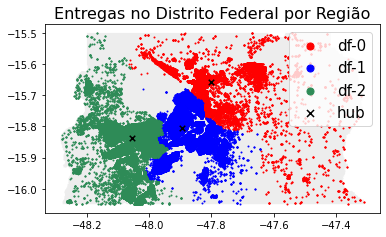

In [ ]:
import matplotlib.pyplot as plt

# cria o plot vazio
fig, ax = plt.subplots()

# plot mapa do distrito federal
mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

# plot das entregas
geo_deliveries_df.query("regiao == 'df-0'").plot(ax=ax, markersize=1, color="red", label="df-0")
geo_deliveries_df.query("regiao == 'df-1'").plot(ax=ax, markersize=1, color="blue", label="df-1")
geo_deliveries_df.query("regiao == 'df-2'").plot(ax=ax, markersize=1, color="seagreen", label="df-2")

# plot dos hubs
geo_hub_df.plot(ax=ax, markersize=30, marker="x", color="black", label="hub")

# plot da legenda
plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 16})
lgnd = plt.legend(prop={"size": 15})

for handle in lgnd.legendHandles:
    handle.set_sizes([50])

> **INSIGHTS**

1. As **entregas** estão devidamente alocadas aos seus respectivos **hubs**;
2. Os **hubs** das regiões `df-0` e `df-2` fazem **entregas** em locais distantes do centro e entre si, geraando um tempo e preço de entrega maior.

> **Entregas por região**

In [ ]:
data = pd.DataFrame(entregas_Loggi[['regiao', 'capacidade_veiculo']].value_counts(normalize=True)).reset_index()
data.rename(columns={0: 'porcentagem_regiao'}, inplace=True)
data.head()

,regiao,capacidade_veiculo,porcentagem_regiao
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


> **Plot**

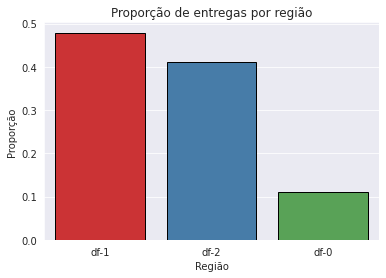

In [ ]:
import seaborn as sns

with sns.axes_style('darkgrid'):
  grafico = sns.barplot(data=data, x='regiao', y='porcentagem_regiao', ci=None, palette='Set1', ec='k')
  grafico.set(title='Proporção de entregas por região', xlabel='Região', ylabel='Proporção');

> **INSIGHT**


A distribuição das **entregas** está muito concentrada nos **hubs** das regiões `df-1` e `df-2`, mas pouco no da região `df-0`. Entretando, a capacidade dos veículos é mesma para todos os **hubs**. Logo, os **veículos** poderiam ser deslocados para as regiões de maior tráfego.